<a href="https://colab.research.google.com/github/fikritrader/Machine-Learning-For-Analytics/blob/master/Markowitz_Theory_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Markowitz Theory using Python**
Hi ML Enthusiasts! In the previous tutorial, we learnt about Markowitz Portfolio theory. In this part 5 of our Financial Analytics series, we will learn building efficient frontier using Markowitz Theory using Python  and we will also learn how we can implement this in Python. In case you’re new to this series, we suggest you go through this series from its starting point, i.e., part 1 of Financial Analytics series.

## **Markowitz Theory using Python – Real-life scenario**
We will look at what shares and stocks profile look like in real-life. In real-life, the shares having higher expected returns have higher risk involved with them, i.e., higher standard deviation. While shares having lower expected returns have lower risk involved.

For this post, we will be used the following values corresponding to shares X and Y.


 
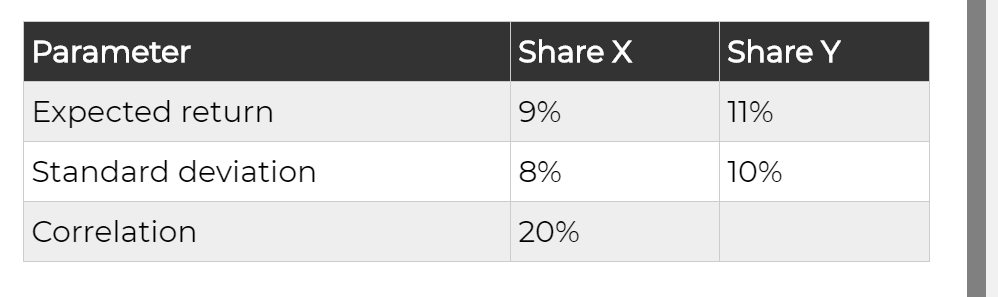

After using the same methodologies and formulae that we used in our previous post, we get following table with only difference being that we use the weight steps of 10%:

 

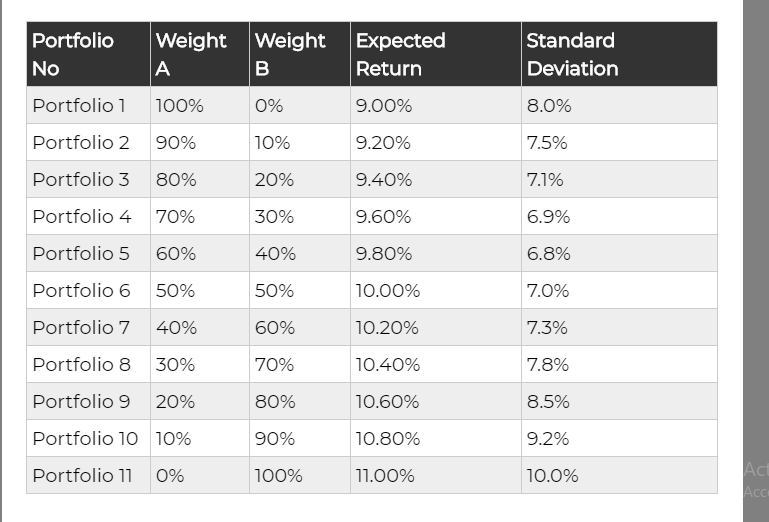

Let’s start analyzing this by Python code.

Let’s first import all the libraries we will be needing for this analysis.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next, we will convert the values in Expected Return column into a list and then will pass this list to a variable, ExpectedReturn. The same will be done for StandardDeviation.

In [0]:
ExpectedReturn = [9.00,9.20,9.40,9.60,9.80,10.00,10.20,10.40,10.60,10.80,11.00]
StandardDeviation = [8.0,7.5,7.1,6.9,6.8,7.0,7.3,7.8,8.5,9.2,10.0]

We will now use matplotlib library of python to come up with scatter plot. We want standard deviation on x-axis and expected return on y-axis.

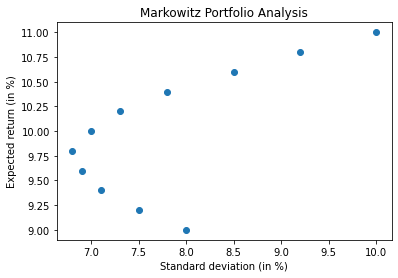

In [3]:
plt.scatter(StandardDeviation, ExpectedReturn)
plt.xlabel("Standard deviation (in %)")
plt.ylabel("Expected return (in %)")
plt.title("Markowitz Portfolio Analysis")
plt.show()

## **Markowitz Theory using Python – Efficient and inefficient frontiers**
From above chart, we can see that for same values of standard deviation, we are getting both higher and lower values of returns – these points correspond to standard deviation of 7, 7.5 and 8, for which the curve is forming parabola – for these values of standard deviation and lower returns, the portfolios that we get are termed as Inefficient Frontier and the need is to avoid the values/points below expected return of 9.75%. All values above this value form part of efficient frontier.

Let’s now import pandas_datareader library and start implementing everything we have learnt so far.

In [4]:
from pandas_datareader import data as dr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


We will be choosing The Procter and Gamble company and The Microsoft Corporation historical data in our analysis.

In [0]:
stocks = ['PG', 'MSFT']

Fetching last 10 year data – Adj Close figures for each of these companies

In [0]:
stock_data = pd.DataFrame()
for s in stocks:
    stock_data[s] = dr.DataReader(s, data_source = 'yahoo', start = '2010-01-01')['Adj Close']

In [8]:
stock_data.head()

,PG,MSFT
Date,,
2010-01-04,44.054558,24.294369
2010-01-05,44.068977,24.302216
2010-01-06,43.859955,24.153070
2010-01-07,43.622089,23.901886
2010-01-08,43.564434,24.066734


In [9]:
stock_data.tail()

,PG,MSFT
Date,,
2020-05-13,113.919998,179.750000
2020-05-14,113.809998,180.529999
2020-05-15,114.610001,183.160004
2020-05-18,116.209999,184.910004
2020-05-19,112.440002,183.630005


Let’s now normalize this data and see their line charts to see their trends and compare them with each-other.

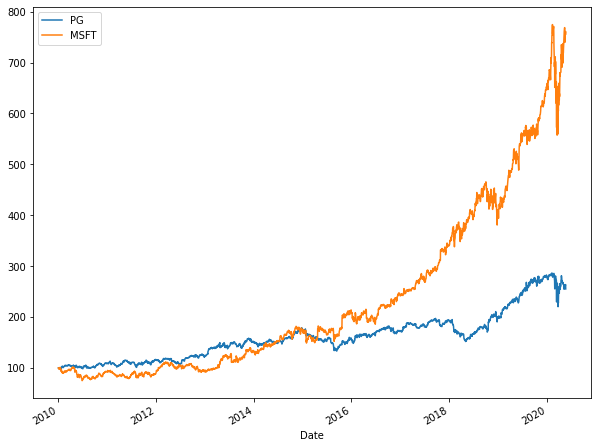

In [10]:
(stock_data/stock_data.iloc[0] * 100).plot(figsize = (10,8))

From the above chart, we can see that Microsoft had exponential growth. PG, on the other hand, took approximately had linear growth with low slope. Till 2015, PG had upper hand, after 2015, Microsoft, owing to its exponential rate, did wonders. In 2020, both saw downward trend (COVID-19 impact?).

Let’s obtain the logarithmic returns figures for both of them. 

In [11]:
logReturns = np.log(stock_data/stock_data.shift(1))
logReturns

,PG,MSFT
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.000323
2010-01-06,-0.004754,-0.006156
2010-01-07,-0.005438,-0.010454
2010-01-08,-0.001323,0.006873
...,...,...
2020-05-13,-0.005515,-0.015238
2020-05-14,-0.000966,0.004330
2020-05-15,0.007005,0.014463


In [12]:
#To obtain annual average returns!
logReturns.mean() * 250 

PG      0.089716
MSFT    0.193669
dtype: float64

In [13]:
#To obtain annual covariance between PG and Microsoft
logReturns.cov() * 250 

,PG,MSFT
PG,0.029498,0.019365
MSFT,0.019365,0.062499


From above, we can see that annual average returns of Microsoft, after looking at the past 10 years data, comes out to be 18.7% while that of PG comes out to be 9.26%, just half of that of Microsoft.

The covariance of PG and MSFT is 0.0192. The autocovariance of MSFT is 0.062 and that of PG is 0.029.

Let’s now compute the correlation matrix for both of them.

In [14]:
stock_data.corr()

,PG,MSFT
PG,1.00000,0.92756
MSFT,0.92756,1.00000


From above, we can see that there is fair amount of relationship of 92.5% (>30%) between PG and MSFT.

Let’s now start creating efficient frontier.

In [15]:
# Dynamically generating weights code
numberOfStocks = len(stocks)
numberOfStocks

2

In [16]:
# Creating random weights
# Function random of numpy will generate two floats
weights = np.random.random(numberOfStocks)
weights

array([0.13435004, 0.03494801])

In [17]:
weights.sum()

0.16929804776262447

In [18]:
weights = weights/np.sum(weights)
weights

array([0.7935711, 0.2064289])

In [19]:
weights.sum()

1.0

We see that weights array has sum equal to 1 or 100%. The weight of first stock, i.e., PG will be set as 16.92% and that of MSFT will be set as 93.35%.

## **Calculating expected return of portfolio**

In [20]:
(weights * logReturns.mean()).sum() * 250

0.11117466501776468

Thus, the expected return of the portfolio with these weights comes out to be 17.09&

## **Expected standard deviance or volatility**

In [21]:
np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights)))

0.16608507720187166

We can see that the standard variance or volatility of the portfolio comes out to be 22.13% which is very high.

## **Simulation with same stocks but different weights**
We are doing this simulation to find out the most optimum sets of weights for which standard deviation or volatility comes out to be minimum and expected return comes out to be maximum. Let’s do this for 100 different sets of weights first.

In [22]:
#Creating blank lists
expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []

# Running simulations for finding optimum weights
for i in range(100):
    weights = np.random.random(numberOfStocks)
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) #Weights for PG
weightList1 = np.array(weightList1) #Weights for MSFT
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df = pd.DataFrame({"Weight of PG": weightList0, "Weight of MSFT": weightList1, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
0,0.377862,0.622138,0.154389,0.193668
1,0.186058,0.813942,0.174328,0.219755
2,0.322032,0.677968,0.160193,0.200604
3,0.499117,0.500883,0.141784,0.180862
4,0.964448,0.035552,0.093411,0.169837


Let’s now plot this on a scatter chart

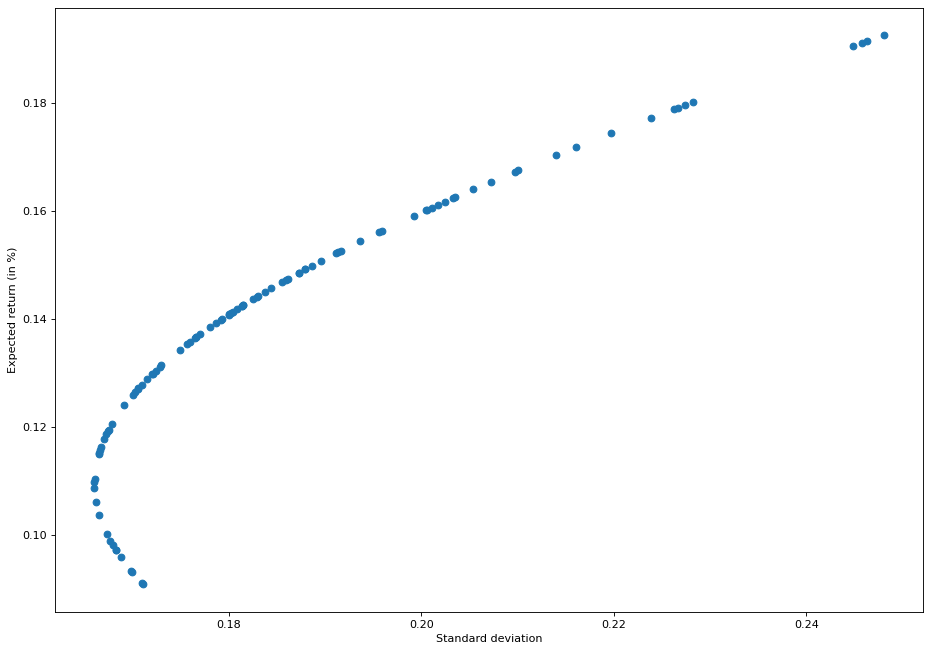

In [23]:
plt.figure(figsize=(14, 10), dpi=80)
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

From above chart, we see that values above the expected return of 0.11 or 11% correspond to the efficient frontier and those below 11% correspond to inefficient frontier.

The above chart also states the same thing – if you want greater return, you will have to take greater risk! If you’re risk averse person, then take the values of weights corresponding to expected return of 11%. Let’s see what are the values corresponding to them.

In [24]:
df[(df["Expected Return"]>0.11) & (df["Expected Return"]< 0.12)].sort_values(by=['Expected Return'])

,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
45,0.801386,0.198614,0.110362,0.166054
13,0.757210,0.242790,0.114955,0.166486
23,0.754567,0.245433,0.115229,0.166531
90,0.749031,0.250969,0.115805,0.166634
14,0.745116,0.254884,0.116212,0.166712
64,0.729500,0.270500,0.117835,0.167073
57,0.722213,0.277787,0.118593,0.167268
59,0.715853,0.284147,0.119254,0.167452
9,0.713405,0.286595,0.119508,0.167526


In [25]:
df[(df["Expected Return"]>0.11)].sort_values(by=['Expected Return']).head(10)

,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
45,0.801386,0.198614,0.110362,0.166054
13,0.757210,0.242790,0.114955,0.166486
23,0.754567,0.245433,0.115229,0.166531
90,0.749031,0.250969,0.115805,0.166634
14,0.745116,0.254884,0.116212,0.166712
64,0.729500,0.270500,0.117835,0.167073
57,0.722213,0.277787,0.118593,0.167268
59,0.715853,0.284147,0.119254,0.167452
9,0.713405,0.286595,0.119508,0.167526
17,0.703734,0.296266,0.120514,0.167837


Thus, we can see that in case of efficient frontiers, for expected return of 11.37%, the standard deviation is 16.52% which corresponds to weight of 77.56% of PG and 22.43% of MSFT shares.

## **Finding most optimum portfolio**

In [26]:
df["Expected Return"].mean()

0.1398875617127337

In [27]:
df["Expected Return"].sort_values().median()

0.14118946060781984

In [28]:
df[(df["Expected Return"]>0.135)].sort_values(by=['Expected Return'])

,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
58,0.561872,0.438128,0.135260,0.175624
32,0.557381,0.442619,0.135727,0.175964
77,0.550046,0.449954,0.136490,0.176532
37,0.549134,0.450866,0.136585,0.176604
96,0.548825,0.451175,0.136617,0.176628
...,...,...,...,...
44,0.131158,0.868842,0.180035,0.228256
46,0.030131,0.969869,0.190537,0.244843
67,0.024445,0.975555,0.191128,0.245809
22,0.021766,0.978234,0.191406,0.246266


In [29]:
df.loc[63]

Weight of PG          0.623255
Weight of MSFT        0.376745
Expected Return       0.128880
Standard deviation    0.171532
Name: 63, dtype: float64

In [30]:
df.loc[49]

Weight of PG          0.307960
Weight of MSFT        0.692040
Expected Return       0.161656
Standard deviation    0.202445
Name: 49, dtype: float64

Going by both mean and median of efficient frontiers, we can see that Weight of PG varies from 51.57% to 49.57% and that of MSFT varies from 48.42% to 50.42%. This variation leads to expected return from 13.82% to 14.01% with volatility from 17.84% to 18.02%.

The point worth to be mentioned over here is that the volatility of MSFT is higher than that of PG. PG is more stable than MSFT. So, as we go from reducing PG weights and increasing MSFT weights, we are not only increasing returns, we are also increasing volatility of portfolio.

So guys, with this we conclude this tutorial on Financial Analytics. In the next part, we will be diving deeper into the world of Financial Analytics. Stay tuned!

source: https://mlforanalytics.com/2020/04/12/financial-analytics-markowitz-theory-using-python/